In [141]:
# import modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from matplotlib import colors
import pandas as pd
import math
import glob
%matplotlib inline

In [144]:
#Customise figure style 
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=9)
rc('ytick.major',pad=5)
rc('xtick.major',pad=5)
padding = 8

#ColourMap
ColourMap = cm.RdBu

In [145]:
#folder location 
#Folder = "/home/jrs17/Dakota_Results/CB_newK/CB_5050/"
#Files = [Folder+'A_0.0205116_R_97.949_W_0.000837083',
 #        Folder+'A_0.044157_R_97.949_W_0.000837083',
  #       Folder+'A_0.0311172_R_97.949_W_0.000837083',
   #      
    #     Folder+'A_0.0311172_R_23.3884_W_0.00019988',
     #    Folder+'A_0.0311172_R_404.576_W_0.00345755',
      #   
       #  Folder+'A_0.0311172_R_97.949_W_0.00660005',
        # Folder+'A_0.0311172_R_97.949_W_5.47915e-05']   

Folder = "/home/jrs17/Dakota_Results/EnsembleScalby/SY_5050/"
#Files = [Folder+'A_0.0116413_R_47.7529_W_0.109217',
 #        Folder+'A_0.0191426_R_47.7529_W_0.109217',
  #       Folder+'A_0.0147231_R_47.7529_W_0.109217',
   #      
    #     Folder+'A_0.0147231_R_17.7419_W_0.0405781',
     #    Folder+'A_0.0147231_R_161.808_W_0.370076',
      #   
       #  Folder+'A_0.0147231_R_47.7529_W_0.0328217',
        # Folder+'A_0.0147231_R_47.7529_W_0.450179']

NumFiles = len(Files)

/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning ca

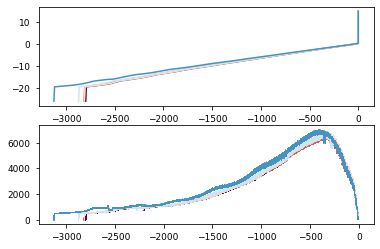

3123.4


<Figure size 432x288 with 0 Axes>

In [146]:
#Profile & Concentrations
for i, FileName in enumerate(Files):
    #create blank figure
    fig1 = plt.figure(1)
    plt.figure(1,figsize=(8,4))
    
    #set up axis
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    #ax3 = plt.subplot(313)
    
    #First load morphology through time 
    #declare the file and the axis
    ProfileName = FileName+"_EnsembleShoreProfile.xz"
    #ProfileName = FileName+"_ShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    StartTime = float(MorphLines[2].strip().split(" ")[0])
    EndTime = float(MorphLines[-1].strip().split(" ")[0])
    f.close()
    
    #Get last cliff position
    LastOutput = MorphLines[-1].strip().split(" ")
    LastProfile = np.array(LastOutput[2:],dtype="float64")
    LCPosition = float(LastOutput[3])
    LastProfile = (LCPosition-LastProfile)*-1
    
    #Read morphology
    #Get z values
    HeaderLine = MorphLines[0].strip().split(" ")
    CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
    MinElev = float(HeaderLine[1])
    dZ = float(HeaderLine[2])
    NValues = (int)((CliffHeight-MinElev)/dZ+1)
    Z = np.linspace(CliffHeight, MinElev, NValues)
    Z_LastProfile = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
    #Second load CRN concentrations through time
    #declare the file and the axis
    #ProfileName = FileName+"Concentrations.xn"
    ProfileName = FileName+"_EnsembleConcentration.xn"
    f = open(ProfileName,'r')
    NLines = f.readlines()
    f.close()
    
    #Only plot every 100 years
    PlotTime = 8000
    PlotInterval = 10 #100
    
    #plot topo profile axis 1
    ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
    
    #Get header and set up X coord
    for j in range(1,NoLines-1):
        N10Line = (NLines[-1].strip().split(" "))
        N10 = np.array(N10Line[2:],dtype="float64")
        X2 = np.arange(0,len(N10)) #*0.1
        
        #Normalise so cliff position = 0m
        X2 = (LCPosition-X2)*-1
        mask = [N10!=N10[-1]]
        N10 = N10[mask]
        X2 = X2[mask]
        
        #plot CRN profile axis 2
        ax2.plot(X2,N10,'-',color=ColourMap(float(i)/float(NumFiles)),lw=0.5)
        
fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('Final_300.png',dpi=300)

print(LCPosition)


/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


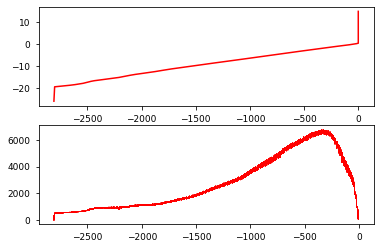

In [147]:
#add best fit line to plot 

#create blank figure
fig1 = plt.figure(1)
plt.figure(1,figsize=(8,4))
    
#set up axis
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
    

#bestFile_topo = "/home/jrs17/Dakota_Results/CB_newK/CB_5050/CB_5050_best_EnsembleShoreProfile.xz"
#bestFile_CRN = "/home/jrs17/Dakota_Results/CB_newK/CB_5050/CB_5050_best_EnsembleConcentration.xn"

bestFile_topo = "/home/jrs17/Dakota_Results/EnsembleScalby/SY_5050/SY_5050_best_EnsembleShoreProfile.xz"
bestFile_CRN = "/home/jrs17/Dakota_Results/EnsembleScalby/SY_5050/SY_5050_best_EnsembleConcentration.xn"

f = open(bestFile_topo,'r')
MorphLines = f.readlines()
NoLines = len(MorphLines)
StartTime = float(MorphLines[2].strip().split(" ")[0])
EndTime = float(MorphLines[-1].strip().split(" ")[0])
f.close()
    
#Get last cliff position
LastOutput = MorphLines[-1].strip().split(" ")
LastProfile = np.array(LastOutput[2:],dtype="float64")
LCPosition = float(LastOutput[3])
LastProfile_best = (LCPosition-LastProfile)*-1
    
#Read morphology
#Get z values
HeaderLine = MorphLines[0].strip().split(" ")
CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
MinElev = float(HeaderLine[1])
dZ = float(HeaderLine[2])
NValues = (int)((CliffHeight-MinElev)/dZ+1)
Z = np.linspace(CliffHeight, MinElev, NValues)
Z_LastProfile_best = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
#plot topo profile axis 1
ax1.plot(LastProfile_best,Z_LastProfile_best,'-',color='r',lw=1.5)


#Second load CRN concentrations through time
f = open(bestFile_CRN,'r')
NLines = f.readlines()
f.close()
    
#Get header and set up X coord
for j in range(1,NoLines-1):
    N10Line = (NLines[-1].strip().split(" "))
    N10 = np.array(N10Line[2:],dtype="float64")
    X2 = np.arange(0,len(N10)) #*0.1
        
    #Normalise so cliff position = 0m
    X2 = (LCPosition-X2)*-1
    mask = [N10!=N10[-1]]
    N10_best = N10[mask]
    X2_best = X2[mask]
        
    #plot CRN profile axis 2
    ax2.plot(X2_best,N10_best,'-',color='r',lw=0.5)
    
    #plot best RR 
    Times = np.zeros(NoLines-1)
    XPos = np.zeros(NoLines-1)
    RSL = np.zeros(NoLines-1)
    
    #print(MorphLines[0])
    
    for j in range(1,NoLines):
        #extract each line
        Line = MorphLines[j].split(" ")
        #record the time to our array 
        Times[j-1] = float(Line[0])
        #RSL record
        RSL[j-1] = float(Line[1])
        #record the cliff position to array 
        XPos[j-1] = float(Line[2])
        
        
    if Times[0] == -9999:
        Times[0] = 8000.
    
    RSL = RSL[0::5]
    Times = Times[0::5]
    XPos = XPos[0::5]

    #Calculate retreat rates
    Rates_best = np.diff(XPos)/(Times[1]-Times[2])
    #print(Times[2], Times[1])

    #plot retreat rates axis 3
    #ax3.plot(Times[1:],Rates_best,'-',color='r',label='Retreat Rate')

<Figure size 432x288 with 0 Axes>

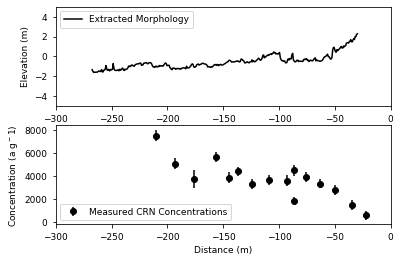

<Figure size 432x288 with 0 Axes>

In [127]:
#figure 2 adding measured data 
fig2 = plt.figure(2)
plt.figure(1,figsize=(6,4))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

#plot modelled data
#ax1.plot(LastProfile,Z_LastProfile,'-', color=[1.,0.,0.4,0.8], lw=1.5)  #color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
#ax2.plot(X2,N10,color=[1.,0.,0.4,0.8],lw=1.5)

#Reading in measured data 
#measured CRN data 
CRNFile = "/home/jrs17/Dakota_Results/SY_CRN.data"
X,CRN,Error=np.loadtxt(CRNFile,unpack=True,skiprows=1,usecols=(1,2,3),delimiter=" ")

#Normalised x positions
NormalisedX = 0 - X

ax2.errorbar(NormalisedX,CRN,fmt='o',yerr=Error,c='k',label='Measured CRN Concentrations')
ax2.scatter(NormalisedX,CRN,s=0.1)

#measured shore profile 
ExProfileName = "/home/jrs17/Dakota_Results/SY_profile.txt" #Swath_Profile_SY.txt"   #CB_profile.txt"
Xprof, Zprof = np.loadtxt(ExProfileName,unpack=True,skiprows=1,usecols=(0,1))
Xprof = 0 - Xprof

ax1.plot(Xprof,Zprof,'k-',lw=1.5,label='Extracted Morphology')

#axis labels
ax1.set_ylabel("Elevation (m)")
ax2.set_ylabel("Concentration (a g$^-1$)")
ax2.set_xlabel("Distance (m)")

ax1.legend(loc='upper left') #, numpoint=1)
ax2.legend(loc='lower left') #, numpoint=1)

#axis limits
#xmin, xmax = ax1.get_xlim()
ax1.set_xlim(-300,0)
ax2.set_xlim(-300,0)
ax1.set_ylim(-5,5)
#ax2.set_ylim(0,9000)

        
fig2 = plt.gcf()
plt.show()
plt.draw()
#fig2.savefig('SY_11_model.png',dpi=300)

/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<Figure size 432x288 with 0 Axes>

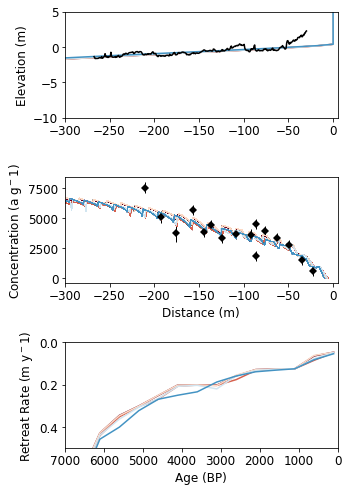

<Figure size 432x288 with 0 Axes>

In [148]:
#adding 3rd panel with retreat rate & RSL
# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=12)
rc('ytick.major',pad=3)
rc('xtick.major',pad=3)
padding = 1
#create blank figure
fig3 = plt.figure(3)
plt.figure(1,figsize=(5,7))
    
#set up axis
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)



#plot modelled data
#ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5,label ='Modelled Profile')
#ax2.plot(X2,N10,'k-',lw=1.5,label='Modelled Concentrations')

#plot measured data
#ax1.plot(Xprof,Zprof,'r-',lw=1.5,label='Extracted Morphology')
#ax2.errorbar(NormalisedX,CRN,fmt='o',yerr=Error,c='grey',label='Measured CRN Concentrations')
#ax2.scatter(NormalisedX,CRN,s=0.1)

ax2.errorbar(NormalisedX,CRN,fmt='D',ms=5,mew=0,yerr=Error,color=(0., 0., 0., 1),lw=1,label='Scalby $^{10}$Be') 

for i, FileName in enumerate(Files):
    
    #plot modelled data
    #ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5,label ='Modelled Profile')
    #ax2.plot(X2,N10,'k-',lw=1.5,label='Modelled Concentrations')
    
    #First load morphology through time 
    #declare the file and the axis
    ProfileName = FileName+"_EnsembleShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    StartTime = float(MorphLines[2].strip().split(" ")[0])
    EndTime = float(MorphLines[-1].strip().split(" ")[0])
    f.close()
    
    #Get last cliff position
    LastOutput = MorphLines[-1].strip().split(" ")
    LastProfile = np.array(LastOutput[2:],dtype="float64")
    LCPosition = float(LastOutput[3])
    LastProfile = (LCPosition-LastProfile)*-1
    
    #Read morphology
    #Get z values
    HeaderLine = MorphLines[0].strip().split(" ")
    CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
    MinElev = float(HeaderLine[1])
    dZ = float(HeaderLine[2])
    NValues = (int)((CliffHeight-MinElev)/dZ+1)
    Z = np.linspace(CliffHeight, MinElev, NValues)
    Z_LastProfile = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
    #Second load CRN concentrations through time
    #declare the file and the axis
    ProfileName = FileName+"_EnsembleConcentration.xn"
    f = open(ProfileName,'r')
    NLines = f.readlines()
    f.close()
    
    #Only plot every 100 years
    PlotTime = 8000
    PlotInterval = 10 #100
    
    #plot topo profile axis 1
    ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
    
    #Get header and set up X coord
    for j in range(1,NoLines-1):
        N10Line = (NLines[-1].strip().split(" "))
        N10 = np.array(N10Line[2:],dtype="float64")
        X2 = np.arange(0,len(N10))#*0.1
        
        #Normalise so cliff position = 0m
        X2 = (LCPosition-X2)*-1
        mask = [N10!=N10[-1]]
        N10 = N10[mask]
        X2 = X2[mask]
        
        #plot CRN profile axis 2
        ax2.plot(X2,N10,'-',color=ColourMap(float(i)/float(NumFiles)),lw=0.5)
        
    
    ProfileName = FileName+"_EnsembleShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    
    #create place holder for cliff position 
    Times = np.zeros(NoLines-1)
    XPos = np.zeros(NoLines-1)
    RSL = np.zeros(NoLines-1)
    
    #print(MorphLines[0])
    
    for j in range(1,NoLines):
        #extract each line
        Line = MorphLines[j].split(" ")
        #record the time to our array 
        Times[j-1] = float(Line[0])
        #RSL record
        RSL[j-1] = float(Line[1])
        #record the cliff position to array 
        XPos[j-1] = float(Line[2])
        
        
    if Times[0] == -9999:
        Times[0] = 8000.
    
    RSL = RSL[0::5]
    Times = Times[0::5]
    XPos = XPos[0::5]
   
    
    #return Times, XPos, RSL

    #print(XPos)
    #print(XPos.size)
    #print(Times)
    #print(Times.size)
    #print(RSL)
    #print(RSL.size)

    #Calculate retreat rates
    Rates = np.diff(XPos)/(Times[1]-Times[2])
    #print(Times[2], Times[1])

    #print(Rates)
    #print(Rates.size)

    #plot retreat rates axis 3
    ax3.plot(Times[1:],Rates,'-',color=ColourMap(float(i)/float(NumFiles)),label='Retreat Rate')
    
    #profilemax = Z_LastProfile.max()
    
    #fill between lines 
    #X_fill = np.linspace(-1600,0,414)
    #ax1.fill_between(X_fill,Z_LastProfile, color='y',alpha=0.5)
    
    #print(Z_LastProfile[1])
    
    #for k in range(0, len(LastProfile)):
    #     minY = np.zeros(len(LastProfile)-1)
         #minY = min(Z_LastProfile)
         #print(minY)

    
    
ax1.plot(Xprof,Zprof,'k-',lw=1.5,label='Extracted Morphology')
#ax1.plot(Xprof2,Zprof2,'k-',lw=1.5,label='Extracted Morphology 2')


#plot best profile results
#ax1.plot(LastProfile_best,Z_LastProfile_best,'-',color='r',lw=1.5)
#ax2.plot(X2_best,N10_best,'-',color='r',lw=0.5)
#ax3.plot(Times[1:],Rates_best,'-',color='r',label='Retreat Rate')


#axis labels
ax3.set_xlabel("Age (BP)")
ax3.set_ylabel("Retreat Rate (m y$^-1$)")
#axis limits
#xmin, xmax = ax3.get_xlim()
#ax3.set_xlim(8000,0)

#ax3.set_xlim(np.max(Times),np.min(Times))

#plot RSL axis 3 with different axis
#ax4 = ax3.twinx()
#ax4.set_ylabel("RSL (m)")
#ax4.plot(Times,RSL,'r--',label='Bideford RSL')

#axis limits

ax1.set_xlim(-300,5)
ax1.set_ylim(-10,5)

ax2.set_xlim(-300,5)
#ax2.set_ylim(0,16)
ax3.set_xlim(7000,0)
#ax4.set_xlim(7000,0)
ax3.set_ylim(0.5,0)
#ax4.set_ylim(-10,0)
##ax3.legend(loc='lower right')
#ax4.legend(loc='center right')

ax1.set_ylabel("Elevation (m)")
ax2.set_ylabel("Concentration (a g$^-1$)")
ax2.set_xlabel("Distance (m)")

#ax1.legend(loc='upper left') #, numpoint=1)
#ax2.legend(loc='lower left') #, numpoint=1)

fig3 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
#fig3.savefig('CB_5050_full.eps',format='eps')
#fig3.savefig('CB_5050.svg',dpi=300)

##### folder location 
Folder = "/home/jrs17/Dakota_Results/EnsembleScalby/"

#set parameter values explored
WaveAttenuationConst = [0.011995, 0.0164816, 0.0258821]
Resistances = [18.9234, 58.479, 231.206]
WeatheringRates = [0.0216638]


#example - need to edit how K varies
print(len(WeatheringRates))

/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<Figure size 432x288 with 0 Axes>

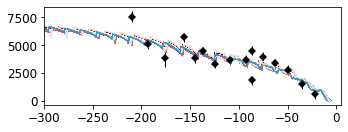

<Figure size 432x288 with 0 Axes>

In [149]:
#adding 3rd panel with retreat rate & RSL
# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=12)
rc('ytick.major',pad=3)
rc('xtick.major',pad=3)
padding = 1
#create blank figure
fig3 = plt.figure(3)
plt.figure(1,figsize=(5,2))
    
#set up axis
ax1 = plt.subplot(111)

for i, FileName in enumerate(Files):
    
    #plot modelled data
    #ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5,label ='Modelled Profile')
    #ax2.plot(X2,N10,'k-',lw=1.5,label='Modelled Concentrations')
    
    #First load morphology through time 
    #declare the file and the axis
    ProfileName = FileName+"_EnsembleShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    StartTime = float(MorphLines[2].strip().split(" ")[0])
    EndTime = float(MorphLines[-1].strip().split(" ")[0])
    f.close()
    
    #Get last cliff position
    LastOutput = MorphLines[-1].strip().split(" ")
    LastProfile = np.array(LastOutput[2:],dtype="float64")
    LCPosition = float(LastOutput[3])
    LastProfile = (LCPosition-LastProfile)*-1
    
    #Read morphology
    #Get z values
    HeaderLine = MorphLines[0].strip().split(" ")
    CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
    MinElev = float(HeaderLine[1])
    dZ = float(HeaderLine[2])
    NValues = (int)((CliffHeight-MinElev)/dZ+1)
    Z = np.linspace(CliffHeight, MinElev, NValues)
    Z_LastProfile = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
    #Second load CRN concentrations through time
    #declare the file and the axis
    ProfileName = FileName+"_EnsembleConcentration.xn"
    f = open(ProfileName,'r')
    NLines = f.readlines()
    f.close()
    
    #Only plot every 100 years
    PlotTime = 8000
    PlotInterval = 10 #100
    
    #plot topo profile axis 1
    #ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
    
    #Get header and set up X coord
    for j in range(1,NoLines-1):
        N10Line = (NLines[-1].strip().split(" "))
        N10 = np.array(N10Line[2:],dtype="float64")
        X2 = np.arange(0,len(N10))#*0.1
        
        #Normalise so cliff position = 0m
        X2 = (LCPosition-X2)*-1
        mask = [N10!=N10[-1]]
        N10 = N10[mask]
        X2 = X2[mask]
        
        #plot CRN profile axis 2
        ax1.plot(X2,N10,'-',color=ColourMap(float(i)/float(NumFiles)),lw=0.5)
        
    
    ProfileName = FileName+"_EnsembleShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    
    #create place holder for cliff position 
    Times = np.zeros(NoLines-1)
    XPos = np.zeros(NoLines-1)
    RSL = np.zeros(NoLines-1)
    
    #print(MorphLines[0])
    
    for j in range(1,NoLines):
        #extract each line
        Line = MorphLines[j].split(" ")
        #record the time to our array 
        Times[j-1] = float(Line[0])
        #RSL record
        RSL[j-1] = float(Line[1])
        #record the cliff position to array 
        XPos[j-1] = float(Line[2])
        
        
    if Times[0] == -9999:
        Times[0] = 8000.
    
    RSL = RSL[0::5]
    Times = Times[0::5]
    XPos = XPos[0::5]
   
    
    #return Times, XPos, RSL

    #print(XPos)
    #print(XPos.size)
    #print(Times)
    #print(Times.size)
    #print(RSL)
    #print(RSL.size)

    #Calculate retreat rates
    Rates = np.diff(XPos)/(Times[1]-Times[2])
    #print(Times[2], Times[1])

    #print(Rates)
    #print(Rates.size)

    #plot retreat rates axis 3
    #ax1.plot(Times[1:],Rates,'-',color=ColourMap(float(i)/float(NumFiles)),label='Retreat Rate')
    
#plot best profile results
#ax1.plot(LastProfile_best,Z_LastProfile_best,'-',color='r',lw=1.5)
#ax1.plot(X2_best,N10_best,'-',color='r',lw=0.5)
#ax1.plot(Times[1:],Rates_best,'-',color='r',label='Retreat Rate')

#plot measured data 
#ax1.plot(Xprof,Zprof,'k-',lw=1.5,label='Extracted Morphology')
ax1.errorbar(NormalisedX,CRN,fmt='D',ms=5,mew=0,yerr=Error,color=(0., 0., 0., 1),lw=1,label='Scalby $^{10}$Be')

ax1.set_xlim(-300,5)
#ax1.set_ylim(-3,3)

#ax1.set_xlim(7000,0)
#ax4.set_xlim(7000,0)
#ax1.set_ylim(1,0.0)


#plot RSL axis 3 with different axis

#RSLFile = "/home/jrs17/plotting/SY_RSL_rate.data"
#Time2,RSL2=np.loadtxt(RSLFile2,unpack=True,skiprows=1,usecols=(0,1),delimiter=" ")
#Time,RSL,change,rate=np.loadtxt(RSLFile,unpack=True,skiprows=1,usecols=(0,1,2,3),delimiter=" ")

#ax1.plot(Time2,RSL2,color=(1, 0., 0., 1),lw=1,label='RSL St Marg')
#ax2 = ax1.twinx()
#ax2.set_ylabel("RSL (m)")
#ax2.plot(Time,rate,'r--',label='Bideford RSL')
#ax2.set_ylim(0.12,0.02)

fig3 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
#fig3.savefig('SY_pareto2_CRN.eps',format='eps')
#fig3.savefig('CBold_RR_5800.png',dpi=300)
#print(Times[2])

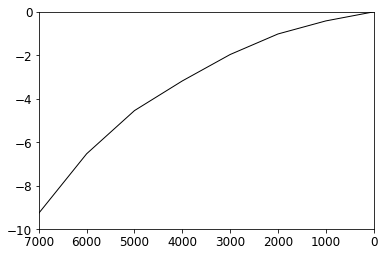

<Figure size 432x288 with 0 Axes>

In [301]:
#plot RSL 

fig1 = plt.figure(1)
plt.figure(1,figsize=(8,3))
ax1 = plt.subplot(111)

RSLFile = "/home/jrs17/plotting/CB_RSL.data"
Time,RSL=np.loadtxt(RSLFile,unpack=True,skiprows=1,usecols=(0,1),delimiter=" ")

ax1.plot(Time,RSL,color=(0., 0., 0., 1),lw=1,label='RSL St Marg') 

ax1.set_xlim(7000,0)
ax1.set_ylim(-10,0)

fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('SM_RSL.png',dpi=300)